# Lab 8 - Detecção de Anomalias em Transações Financeiras com Linguagem Python e Power BI

Autor: Leonardo Simões

In [1]:
# Verificação da versão do Python
from platform import python_version
print('Versão do Python: ', python_version())

Versão do Python:  3.11.2


In [2]:
# Imports das bibliotecas mais usadas
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.ensemble import IsolationForest

%matplotlib inline

In [3]:
# Define a precisão para 4 casa decimais no pandas
pd.options.display.float_format = '{:.4f}'.format

In [4]:
# Oculta alguns alertas
import warnings
warnings.simplefilter("ignore")

In [5]:
# Versões das bibliotecas mais usadas
print('Numpy versão ' + np.__version__)
print('Pandas versão ' + pd.__version__)
print('Matplotlib versão ' + mpl.__version__)
print('Seaborn versão ' + sns.__version__)
print('Scikit-learn versão ' + skl.__version__)

Numpy versão 1.23.5
Pandas versão 1.5.3
Matplotlib versão 3.7.0
Seaborn versão 0.12.2
Scikit-learn versão 1.2.2


In [6]:
# Carrega e Exibe os dados
df = pd.read_csv('dados_historicos.csv')
df.head()

,transacao1,transacao2
0,12.6692,62.5871
1,32.3547,-21.4607
2,-16.4933,33.1129
3,1.0421,60.2180
4,11.9590,59.4238


In [7]:
# Dimesões do dataframe
df.shape

(650, 2)

In [8]:
# Identifica as colunas originais dos dados
colunas_transacoes = df.columns.to_list()
colunas_transacoes

['transacao1', 'transacao2']

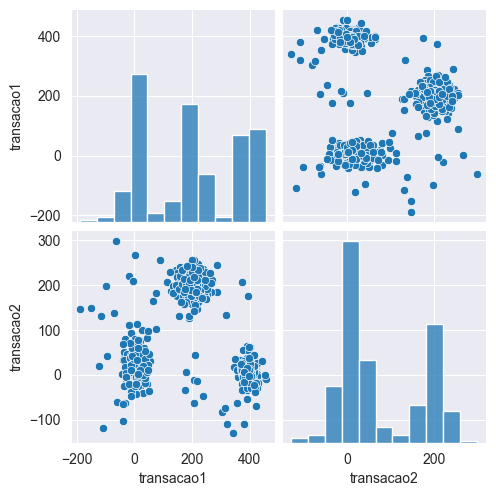

In [9]:
# Gráfico de pares (dispersão e barras)
sns.pairplot(df[colunas_transacoes]);

In [10]:
# Cria um classificador IsolationForest e treina um modelo
valores = df[colunas_transacoes].values
clf = IsolationForest(random_state=0)
modelo = clf.fit(valores)
modelo

IsolationForest(random_state=0)

In [11]:
# Cria as colunas 'scores' e 'anomaly' usando o modelo
df['scores'] = modelo.decision_function(df[colunas_transacoes])
df['anomaly'] = modelo.predict(df[colunas_transacoes])

In [12]:
# Distribuição dos valores de anomaly
df['anomaly'].value_counts()

 1    543
-1    107
Name: anomaly, dtype: int64

In [13]:
# Distribuição percentual dos valores de anomaly
df['anomaly'].value_counts(normalize=True)

 1   0.8354
-1   0.1646
Name: anomaly, dtype: float64

In [14]:
# Exibe o dataframe com novas colunas geradas pelo modelo
df.head()

,transacao1,transacao2,scores,anomaly
0,12.6692,62.5871,0.0428,1
1,32.3547,-21.4607,0.0277,1
2,-16.4933,33.1129,0.0671,1
3,1.0421,60.2180,0.0508,1
4,11.9590,59.4238,0.0548,1


In [15]:
# Cria coluna de classificação em anomalia e normal
df['classificacao'] = 'Sem classificação'
df.loc[df['anomaly'] == 1, 'classificacao'] = 'Normal'
df.loc[df['anomaly'] == -1, 'classificacao'] = 'Anomalia'

In [16]:
# Distribuição dos valores de classificacao
df['classificacao'].value_counts()

Normal      543
Anomalia    107
Name: classificacao, dtype: int64

In [17]:
# Distribuição percentual dos valores de classificacao
df['classificacao'].value_counts(normalize=True)

Normal     0.8354
Anomalia   0.1646
Name: classificacao, dtype: float64

In [18]:
# Filtra o dataframe para os classificados como anomalias
anomaly = df.loc[df['classificacao']=='Anomalia']
anomaly_index = list(anomaly.index)
anomaly

,transacao1,transacao2,scores,anomaly,classificacao
5,-32.7026,79.1364,-0.0518,-1,Anomalia
20,-29.2477,-18.4744,-0.0055,-1,Anomalia
27,-6.9955,-44.2385,-0.0266,-1,Anomalia
31,-61.9257,-61.0411,-0.1405,-1,Anomalia
38,-13.7783,93.3876,-0.0285,-1,Anomalia
...,...,...,...,...,...
615,415.9505,43.5612,-0.0092,-1,Anomalia
617,349.6947,34.8429,-0.0350,-1,Anomalia
633,443.3018,30.4722,-0.0405,-1,Anomalia
639,397.5232,62.9576,-0.0499,-1,Anomalia


In [19]:
# Filtra o dataframe para os classificados como normal
normal = df.loc[df['classificacao'] == 'Normal']
normal_index=list(normal.index)
normal

,transacao1,transacao2,scores,anomaly,classificacao
0,12.6692,62.5871,0.0428,1,Normal
1,32.3547,-21.4607,0.0277,1,Normal
2,-16.4933,33.1129,0.0671,1,Normal
3,1.0421,60.2180,0.0508,1,Normal
4,11.9590,59.4238,0.0548,1,Normal
...,...,...,...,...,...
645,372.0097,24.0654,0.0497,1,Normal
646,399.6298,37.3926,0.0374,1,Normal
647,391.9359,15.3741,0.0937,1,Normal
648,382.0998,6.5205,0.0907,1,Normal


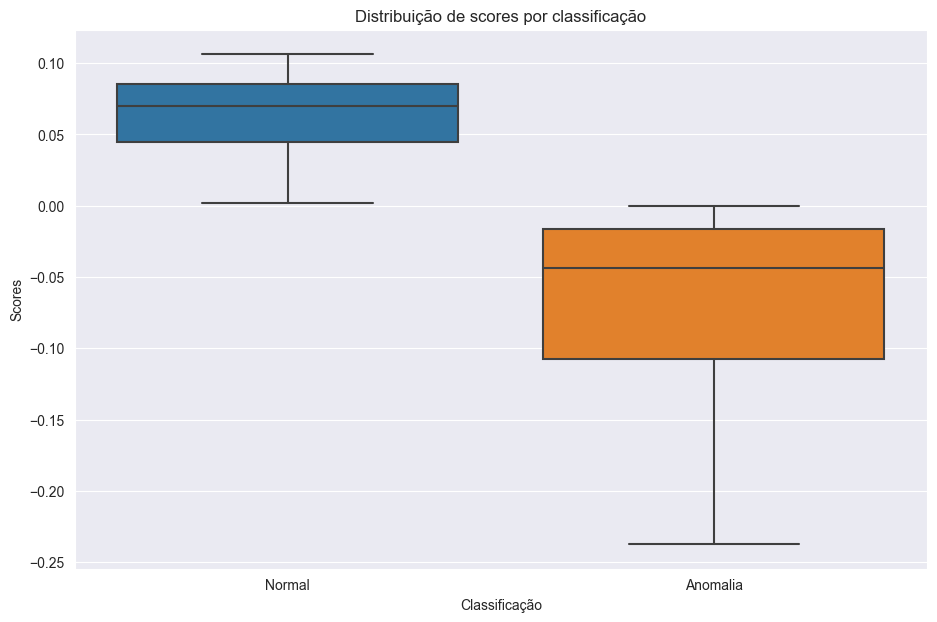

In [20]:
# Gráfico de Caixa (Boxplot)
fig = plt.figure(figsize=(11, 7))
ax = sns.boxplot(x=df['classificacao'], y=df['scores'])
ax.set_title('Distribuição de scores por classificação')
ax.set_xlabel('Classificação')
ax.set_ylabel('Scores')
plt.show()

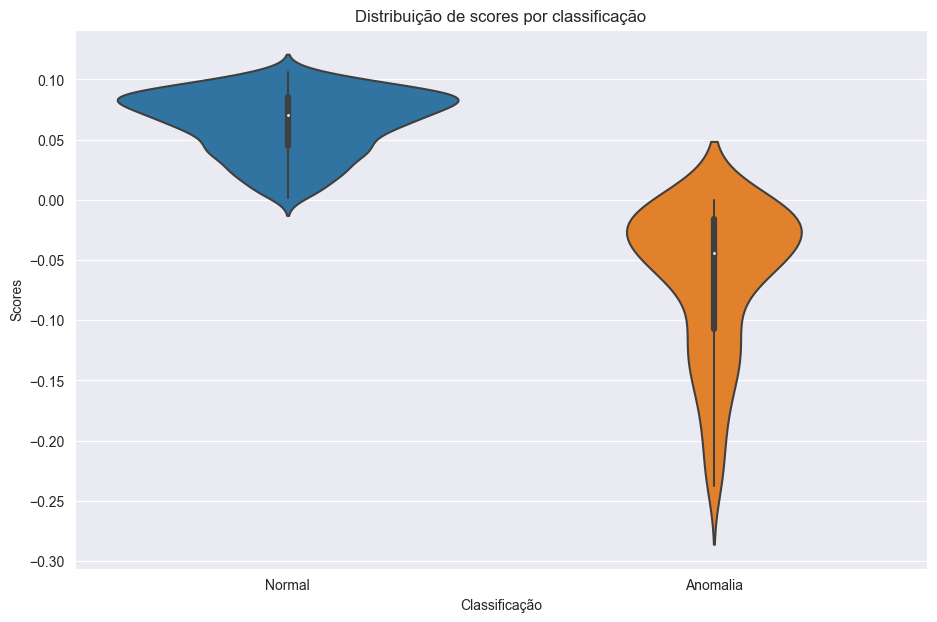

In [21]:
# Gráfico de violina
fig = plt.figure(figsize=(11, 7))
ax = sns.violinplot(x=df['classificacao'], y=df['scores'])
ax.set_title('Distribuição de scores por classificação')
ax.set_xlabel('Classificação')
ax.set_ylabel('Scores')
plt.show()

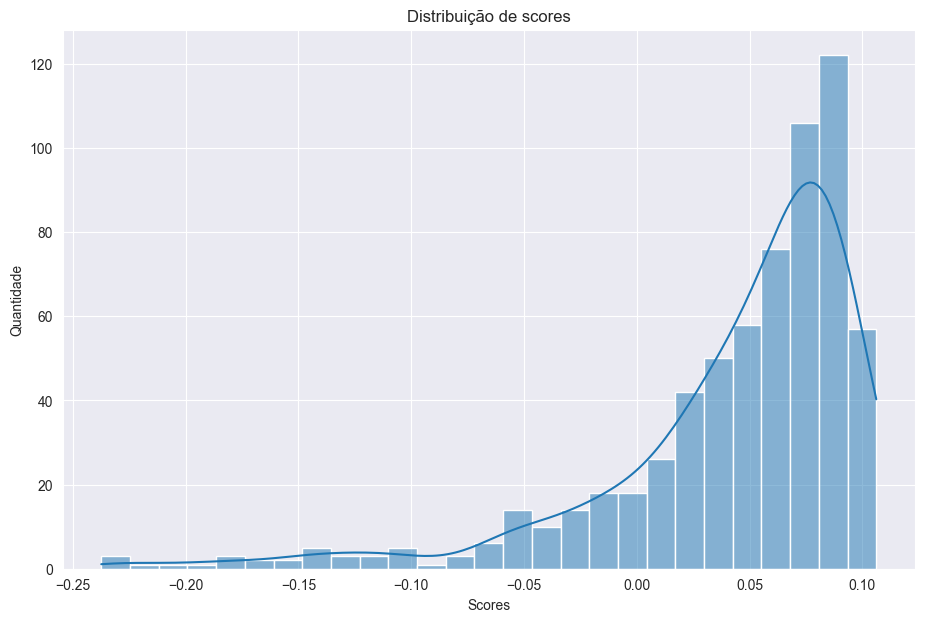

In [22]:
# Histograma
fig = plt.figure(figsize=(11, 7))
ax = sns.histplot(data=df, x="scores", kde=True)
ax.set_title('Distribuição de scores')
ax.set_xlabel('Scores')
ax.set_ylabel('Quantidade')
plt.show()

In [23]:
# Dataframe com médias dos scores por classificação
df_score_mean = pd.DataFrame({'Classificacao' : ['Normal', 'Anomalia'], 'Media_Score' : [normal['scores'].mean(), anomaly['scores'].mean()]})
df_score_mean

,Classificacao,Media_Score
0,Normal,0.0641
1,Anomalia,-0.0650


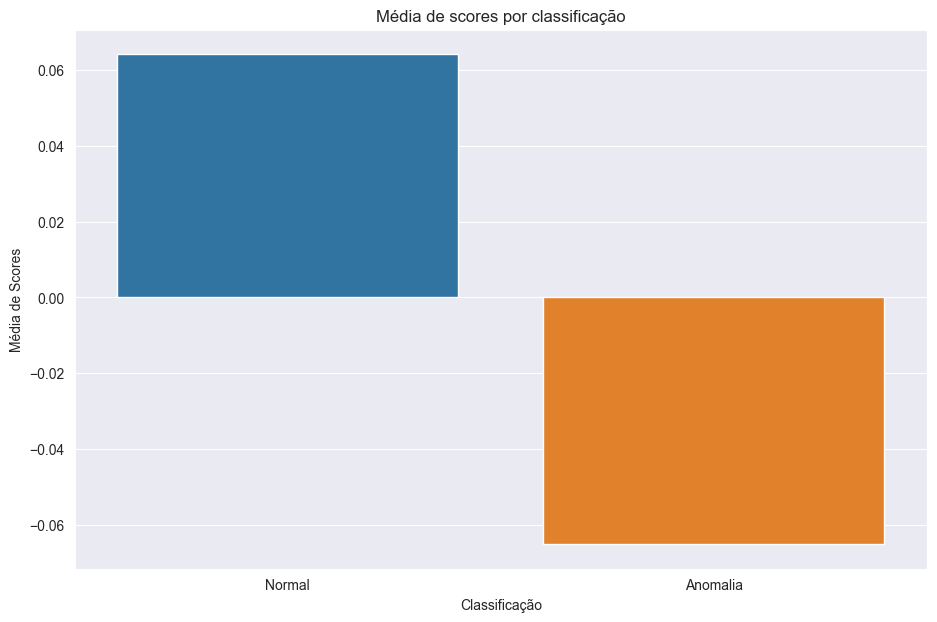

In [24]:
# Gráfico de Barras
fig = plt.figure(figsize=(11, 7))
ax = sns.barplot(data=df_score_mean, x='Classificacao', y='Media_Score')
ax.set_title('Média de scores por classificação')
ax.set_xlabel('Classificação')
ax.set_ylabel('Média de Scores')
plt.show()

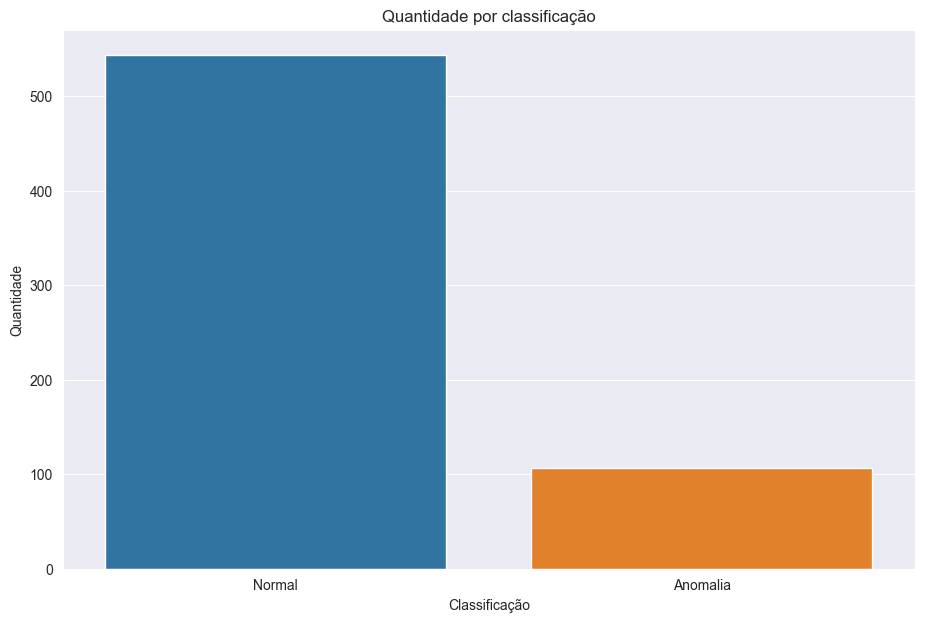

In [25]:
# Gráfico de Barras 2
fig = plt.figure(figsize=(11, 7))
ax = sns.countplot(data=df, x='classificacao')
ax.set_title('Quantidade por classificação')
ax.set_xlabel('Classificação')
ax.set_ylabel('Quantidade')
plt.show()

In [26]:
# Exibe a média de scores de anomalia
print(f'A média de scores de anomalia é {round(anomaly["scores"].mean(),4)}')

A média de scores de anomalia é -0.065


In [27]:
# Exibe o maior score de anomalia
print(f'O maior score de anomalia é {round(anomaly["scores"].max(),4)}')

O maior score de anomalia é -0.0001


In [28]:
# Salva o novo dataset no arquivo dataset_novo.csv
df.to_csv('dataset_novo.csv', index=False)

---
<a id='references'></a>
## Referências

Data Science Academy - Microsoft Power BI Para Business Intelligence e Data Science 3.0:
https://www.datascienceacademy.com.br/course/microsoft-power-bi-para-data-science , acessado em 14/05/2023.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

https://blog.paperspace.com/anomaly-detection-isolation-forest/

